In [64]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_excel('datos-estadistica-platzi.xlsx')
display(df.head())

,ID,País,Estado Socioeconómico,Apps Descargadas,Tiempo en Celular (horas)
0,1,México,Medio,75,4.5
1,2,Colombia,Bajo,30,2.8
2,3,Argentina,Alto,120,7.1
3,4,México,Medio,60,5.0
4,5,Chile,Medio,85,6.3


In [49]:
df.isna().any().any()
if df.isna().any().any() is True:
    print("Hay valores nulos en el DataFrame")
else:
    print("No hay valores nulos en el DataFrame")


No hay valores nulos en el DataFrame


### _Tabla de frecuencias de pais_

In [50]:
frecuencias = (
    df['País'].value_counts()           # de mi dataframe original, selecciona todas las variables categoricas de pais y los cuenta
    .to_frame('Frecuencia Absoluta')    # convierte la serie en seleccionada del dataframe original y la convierte en un dataframe con el nombre de Frecuencia Absoluta
)
frecuencias = frecuencias.reset_index()
display(frecuencias)

,País,Frecuencia Absoluta
0,México,18
1,Colombia,10
2,Argentina,8
3,Chile,7
4,Perú,7


In [51]:
frecuencias['Frecuencia Relativa'] = frecuencias['Frecuencia Absoluta'] / frecuencias['Frecuencia Absoluta'].sum()
frecuencias = frecuencias.reset_index()
display(frecuencias)

,index,País,Frecuencia Absoluta,Frecuencia Relativa
0,0,México,18,0.36
1,1,Colombia,10,0.20
2,2,Argentina,8,0.16
3,3,Chile,7,0.14
4,4,Perú,7,0.14


In [69]:
display(df.columns)

Index(['ID', 'País', 'Estado Socioeconómico', 'Apps Descargadas',
       'Tiempo en Celular (horas)'],
      dtype='object')

### _Tabla de frecuencias de "Estado Socioeconómico"_

In [75]:
frec_edo_soc = (
    df['Estado Socioeconómico'].value_counts()
    .to_frame('Frecuencia Absoluta')
)
frec_edo_soc = frec_edo_soc.reset_index()
display(frec_edo_soc)

,Estado Socioeconómico,Frecuencia Absoluta
0,Medio,30
1,Bajo,13
2,Alto,7


In [76]:
frec_edo_soc['Frecuencia Relativa'] = (
    (frec_edo_soc['Frecuencia Absoluta'] / frec_edo_soc['Frecuencia Absoluta'].sum()) * 100
)


In [79]:
frec_edo_soc['Frecuencia Acumulada'] = (
    frec_edo_soc['Frecuencia Absoluta'].cumsum()
)

frec_edo_soc = frec_edo_soc.reset_index()

display(frec_edo_soc)   # o deja frec_edo_soc como última línea de la celda

,level_0,index,Estado Socioeconómico,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Acumulada
0,0,0,Medio,30,60.0,30
1,1,1,Bajo,13,26.0,43
2,2,2,Alto,7,14.0,50


Text(0.5, 1.0, 'Frecuencias absoluta del edo. socioeconómico')

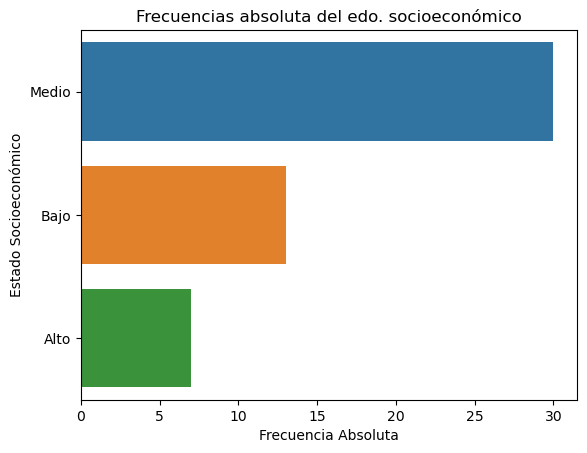

In [90]:
sns.barplot(data=frec_edo_soc, x='Frecuencia Absoluta', y='Estado Socioeconómico')
# plt.pie(data=frec_edo_soc, x='Frecuencia Absoluta')
plt.title('Frecuencias absoluta del edo. socioeconómico')